In [103]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

sns.set()

# Loading the raw data

In [104]:
raw_data = pd.read_csv('car_data.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Preprocessing

In [105]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Determining the variables of interest

In [106]:
data = raw_data.drop('Model', axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Missing values

In [107]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [108]:
data.fillna(data.loc[:, ['Price', 'EngineV']].mean(), inplace=True)
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Outliers

In [109]:
mileage_quantile = data.Mileage.quantile(0.99)
data = data.loc[data.Mileage <= mileage_quantile]

engineV_quantile = data.EngineV.quantile(0.99)
data = data.loc[data.EngineV <= engineV_quantile]

year_quantile = data.Year.quantile(0.01)
data = data.loc[data.Year >= year_quantile]

data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4222,4222.000000,4222,4222.000000,4222.000000,4222,4222,4222.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,909,NaN,1586,NaN,NaN,1972,3833,NaN
mean,NaN,19507.179345,NaN,157.258882,2.480333,NaN,NaN,2006.844387
std,NaN,24855.207549,NaN,97.998083,0.933513,NaN,NaN,6.310131
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1987.000000
25%,NaN,7300.000000,NaN,85.000000,1.900000,NaN,NaN,2003.000000
50%,NaN,12000.000000,NaN,154.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20999.750000,NaN,224.750000,3.000000,NaN,NaN,2012.000000


# Distribution Probability Function

<Axes: xlabel='Year', ylabel='Count'>

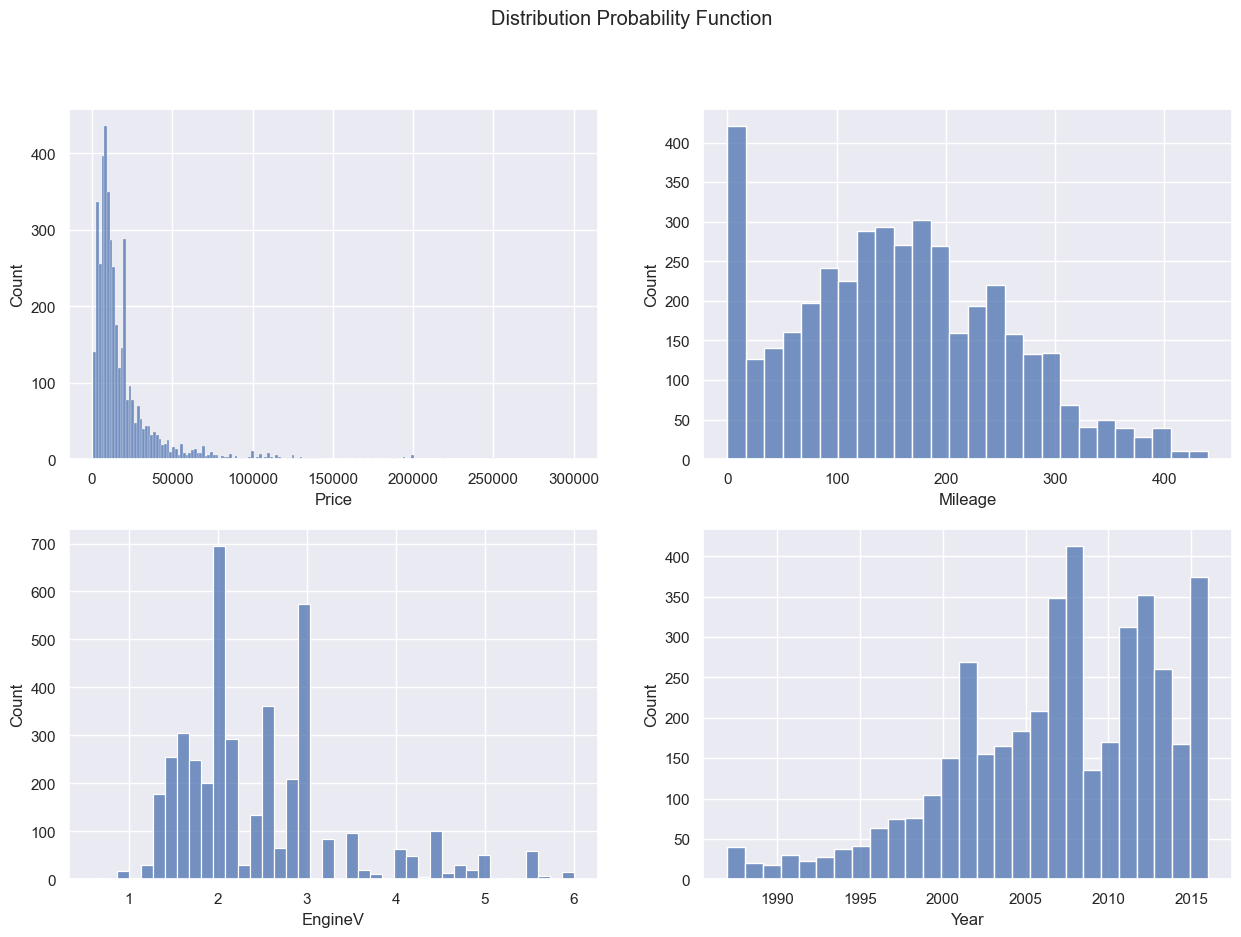

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Probability Function')

sns.histplot(data.Price, ax=axes[0][0])
sns.histplot(data.Mileage, ax=axes[0][1])
sns.histplot(data.EngineV, ax=axes[1][0])
sns.histplot(data.Year, ax=axes[1][1])

# Assumptions

## Linearity

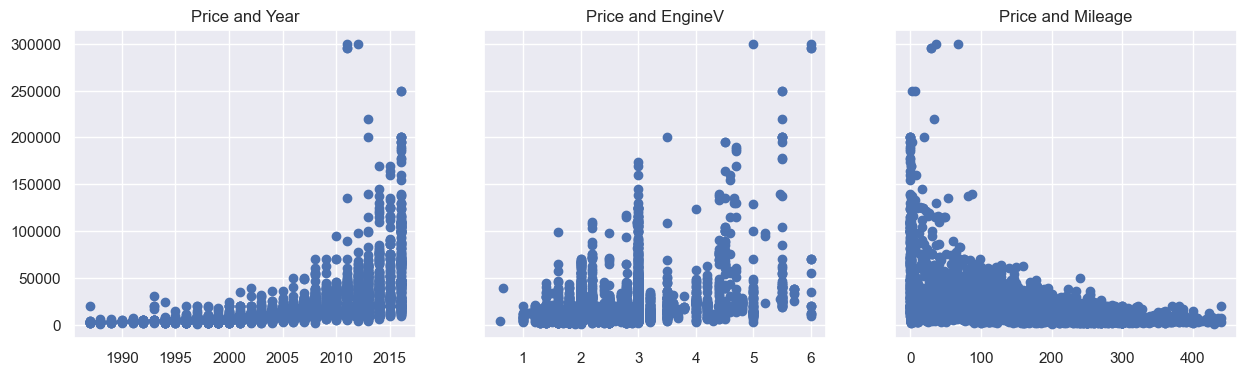

In [111]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all', figsize=(15, 4))

ax1.scatter(data.Year, data.Price)
ax1.set_title('Price and Year')

ax2.scatter(data.EngineV, data.Price)
ax2.set_title('Price and EngineV')

ax3.scatter(data.Mileage, data.Price)
ax3.set_title('Price and Mileage')

plt.show()

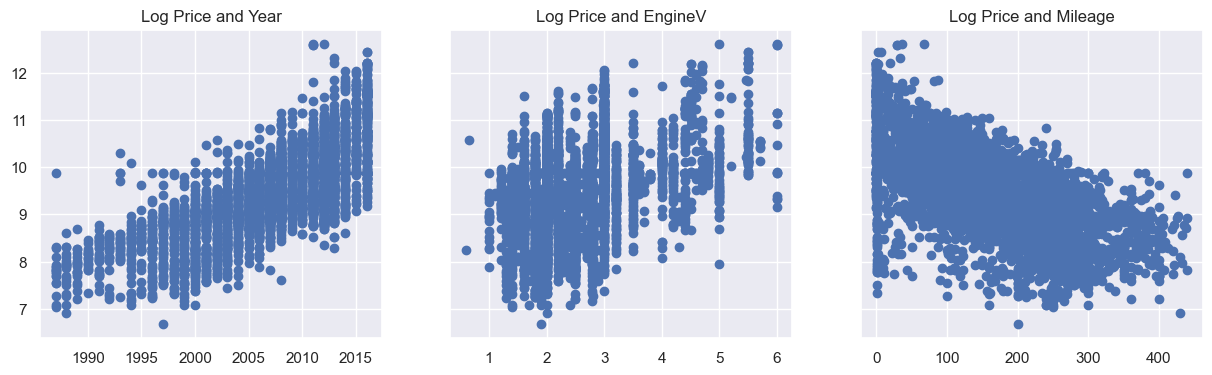

In [112]:
data['Log_Price'] = np.log(data.Price)
data.drop('Price', axis=1, inplace=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all', figsize=(15, 4))

ax1.scatter(data.Year, data.Log_Price)
ax1.set_title('Log Price and Year')

ax2.scatter(data.EngineV, data.Log_Price)
ax2.set_title('Log Price and EngineV')

ax3.scatter(data.Mileage, data.Log_Price)
ax3.set_title('Log Price and Mileage')

plt.show()

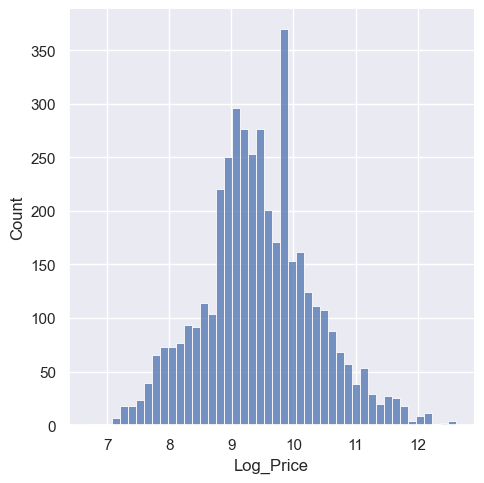

In [113]:
sns.displot(data.Log_Price)

## Multicollinearity

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data.loc[:, ['Mileage', 'EngineV', 'Year']]

vif = pd.DataFrame(np.array(
    [[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])],
     np.array(variables.columns)]
), index=['VIF', 'features']).T

vif

,VIF,features
0,3.555732,Mileage
1,8.079074,EngineV
2,10.986083,Year


In [115]:
data.drop('Year', axis=1, inplace=True)
data.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
count,4222,4222,4222.000000,4222.000000,4222,4222,4222.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,909,1586,NaN,NaN,1972,3833,NaN
mean,NaN,NaN,157.258882,2.480333,NaN,NaN,9.440596
std,NaN,NaN,97.998083,0.933513,NaN,NaN,0.900819
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,85.000000,1.900000,NaN,NaN,8.895630
50%,NaN,NaN,154.000000,2.200000,NaN,NaN,9.392662
75%,NaN,NaN,224.750000,3.000000,NaN,NaN,9.952266


# Dummy Variables

In [116]:
data = pd.get_dummies(data, drop_first=True) * 1
data

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.000000,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.900000,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.000000,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.200000,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.000000,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,35,1.600000,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,9,3.000000,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,1,3.500000,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4343,31,2.790734,9.560997,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data.drop('Log_Price', axis=1)

vif = pd.DataFrame(np.array(
    [[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])],
     np.array(variables.columns)]
), index=['VIF', 'features']).T

vif

,VIF,features
0,4.199839,Mileage
1,8.046579,EngineV
2,2.319675,Brand_BMW
3,2.993395,Brand_Mercedes-Benz
4,1.632742,Brand_Mitsubishi
5,2.069343,Brand_Renault
6,2.163934,Brand_Toyota
7,2.83283,Brand_Volkswagen
8,1.471523,Body_hatch
9,1.545906,Body_other
